<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2'

In [7]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n20.csv')

In [8]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.256503,55.423226,9.035514,135.715243,118.564205,17.151038
1,0.0,1.0,80.179068,79.452898,66.119604,235.751570,157.348201,78.403369
2,0.0,2.0,54.675272,62.740785,6.891532,134.307590,119.833070,14.474520
3,0.0,3.0,45.923246,56.432549,16.847524,129.203319,106.419493,22.783827
4,0.0,4.0,98.270687,99.423049,-39.808131,167.885606,191.600557,-23.714951
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,73.360629,43.424344,52.953714,179.738686,123.472786,56.265901
19996,999.0,16.0,72.940710,72.811746,57.506778,213.259234,142.552496,70.706738
19997,999.0,17.0,30.238258,79.756105,-24.574307,95.420057,115.100758,-19.680701
19998,999.0,18.0,79.981833,70.458207,-119.288826,41.151214,146.281390,-105.130176


In [9]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    61.256503  55.423226    9.035514  135.715243  118.564205   
      1.0    80.179068  79.452898   66.119604  235.751570  157.348201   
      2.0    54.675272  62.740785    6.891532  134.307590  119.833070   
      3.0    45.923246  56.432549   16.847524  129.203319  106.419493   
      4.0    98.270687  99.423049  -39.808131  167.885606  191.600557   
...                ...        ...         ...         ...         ...   
999.0 15.0   73.360629  43.424344   52.953714  179.738686  123.472786   
      16.0   72.940710  72.811746   57.506778  213.259234  142.552496   
      17.0   30.238258  79.756105  -24.574307   95.420057  115.100758   
      18.0   79.981833  70.458207 -119.288826   41.151214  146.281390   
      19.0   68.143747  92.503666  -29.796916  140.850497  151.949906   

                  e_hat  
rep   index              
0.0   0.0     17.151038  
      1.0     78.403369  
      2.0     14.474520  
      3.0     22.783827  
      4.0    -23.714951  
...                 ...  
999.0 15.0    56.265901  
      16.0    70.706738  
      17.0   -19.680701  
      18.0  -105.130176  
      19.0   -11.099409  

[20000 rows x 6 columns]

In [10]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    61.256503  55.423226    9.035514  135.715243  118.564205   
      1.0    80.179068  79.452898   66.119604  235.751570  157.348201   
      2.0    54.675272  62.740785    6.891532  134.307590  119.833070   
      3.0    45.923246  56.432549   16.847524  129.203319  106.419493   
      4.0    98.270687  99.423049  -39.808131  167.885606  191.600557   
...                ...        ...         ...         ...         ...   
999.0 15.0   73.360629  43.424344   52.953714  179.738686  123.472786   
      16.0   72.940710  72.811746   57.506778  213.259234  142.552496   
      17.0   30.238258  79.756105  -24.574307   95.420057  115.100758   
      18.0   79.981833  70.458207 -119.288826   41.151214  146.281390   
      19.0   68.143747  92.503666  -29.796916  140.850497  151.949906   

                  e_hat  
rep   index              
0.0   0.0     17.151038  
      1.0     78.403369  
      2.0     14.474520  
      3.0     22.783827  
      4.0    -23.714951  
...                 ...  
999.0 15.0    56.265901  
      16.0    70.706738  
      17.0   -19.680701  
      18.0  -105.130176  
      19.0   -11.099409  

[20000 rows x 6 columns]

In [11]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.256503,55.423226,9.035514,135.715243,118.564205,17.151038
1,0.0,1.0,80.179068,79.452898,66.119604,235.751570,157.348201,78.403369
2,0.0,2.0,54.675272,62.740785,6.891532,134.307590,119.833070,14.474520
3,0.0,3.0,45.923246,56.432549,16.847524,129.203319,106.419493,22.783827
4,0.0,4.0,98.270687,99.423049,-39.808131,167.885606,191.600557,-23.714951
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,73.360629,43.424344,52.953714,179.738686,123.472786,56.265901
19996,999.0,16.0,72.940710,72.811746,57.506778,213.259234,142.552496,70.706738
19997,999.0,17.0,30.238258,79.756105,-24.574307,95.420057,115.100758,-19.680701
19998,999.0,18.0,79.981833,70.458207,-119.288826,41.151214,146.281390,-105.130176


In [12]:
table.set_index(['rep', 'index'], inplace=True)

In [13]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    61.256503  55.423226    9.035514  135.715243  118.564205   
      1.0    80.179068  79.452898   66.119604  235.751570  157.348201   
      2.0    54.675272  62.740785    6.891532  134.307590  119.833070   
      3.0    45.923246  56.432549   16.847524  129.203319  106.419493   
      4.0    98.270687  99.423049  -39.808131  167.885606  191.600557   
...                ...        ...         ...         ...         ...   
999.0 15.0   73.360629  43.424344   52.953714  179.738686  123.472786   
      16.0   72.940710  72.811746   57.506778  213.259234  142.552496   
      17.0   30.238258  79.756105  -24.574307   95.420057  115.100758   
      18.0   79.981833  70.458207 -119.288826   41.151214  146.281390   
      19.0   68.143747  92.503666  -29.796916  140.850497  151.949906   

                  e_hat  
rep   index              
0.0   0.0     17.151038  
      1.0     78.403369  
      2.0     14.474520  
      3.0     22.783827  
      4.0    -23.714951  
...                 ...  
999.0 15.0    56.265901  
      16.0    70.706738  
      17.0   -19.680701  
      18.0  -105.130176  
      19.0   -11.099409  

[20000 rows x 6 columns]

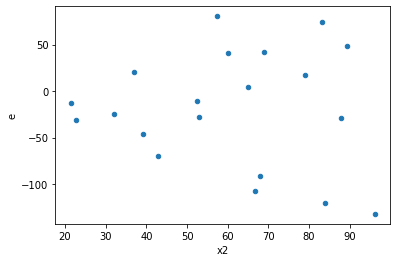

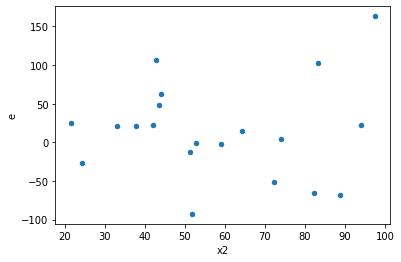

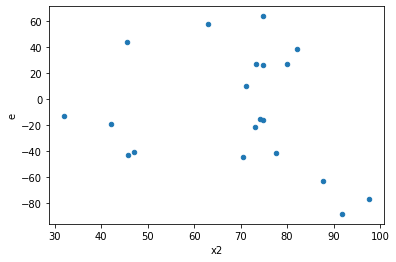

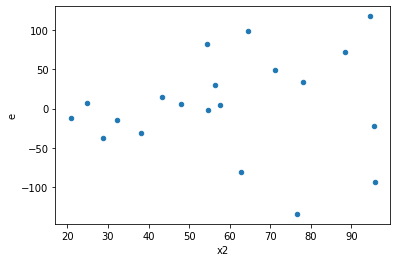

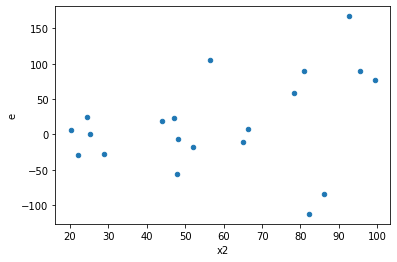

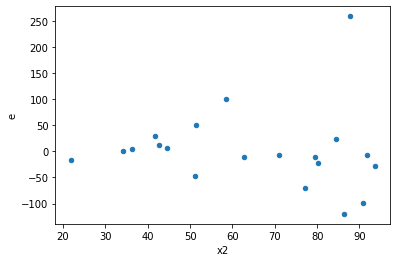

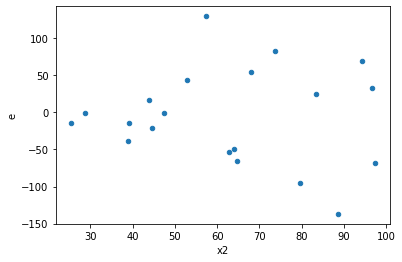

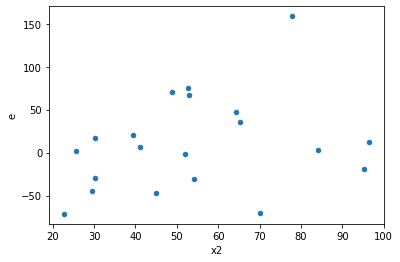

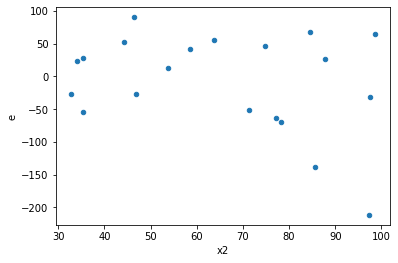

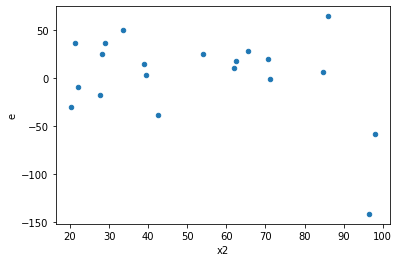

In [14]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [15]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,7.0,4654.658521119219,14107.703866540167,517.1842801243577,2015.3862666485952,3.896843628278866,0.08661931885987828,0.9566903405700609,0.04330965942993914,Reject005=1 : Homoscedasticity
2.0,9.0,7.0,15848.499138082572,30402.708162199924,1760.9443486758414,4343.244023171418,2.4664288944947983,0.24710752927616442,0.8764462353619178,0.12355376463808221,Reject005=1 : Homoscedasticity
5.0,5.0,11.0,1619.3464490870335,66853.41989295588,323.8692898174067,6077.583626632352,18.76554467408384,9.44301371581524e-05,0.9999527849314209,4.72150685790762e-05,Reject005=0 : Heteroscedasticity
7.0,6.0,10.0,2255.5548953123057,35170.11186035907,375.9258158853843,3517.0111860359075,9.35559899697925,0.0025375339396493946,0.9987312330301753,0.0012687669698246973,Reject005=0 : Heteroscedasticity
9.0,6.0,10.0,2450.9597467247063,69790.63489469417,408.49329112078436,6979.063489469418,17.08489133400683,0.00019977627242795393,0.999900111863786,9.988813621397696e-05,Reject005=0 : Heteroscedasticity
10.0,7.0,9.0,1783.3389121226153,56709.972205571066,254.7627017318022,6301.108022841229,24.733243838317552,6.928100613423638e-05,0.9999653594969329,3.464050306711819e-05,Reject005=0 : Heteroscedasticity
11.0,10.0,6.0,12882.726380416954,33942.4691484006,1288.2726380416955,5657.078191400101,4.391211940975034,0.08366132928299708,0.9581693353585015,0.04183066464149854,Reject005=1 : Homoscedasticity
12.0,8.0,8.0,7167.05446189458,13081.613677296686,895.8818077368225,1635.2017096620857,1.8252426777064867,0.41282166458405145,0.7935891677079743,0.20641083229202573,Reject005=1 : Homoscedasticity
14.0,4.0,12.0,1561.6554916009354,68735.07816835253,390.41387290023386,5727.923180696044,14.671413026759309,0.00028637369365647203,0.9998568131531718,0.00014318684682823601,Reject005=0 : Heteroscedasticity


In [17]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,7.0,4654.658521119219,14107.703866540167,517.1842801243577,2015.3862666485952,3.896843628278866,0.08661931885987828,Reject005=1 : Homoscedasticity
1.0,11.0,5.0,31384.03416463375,3255.6312314841484,2853.0940149667044,651.1262462968297,0.22821759215825502,0.0386436245082686,Reject005=0 : Heteroscedasticity
2.0,9.0,7.0,15848.499138082572,30402.708162199924,1760.9443486758414,4343.244023171418,2.4664288944947983,0.24710752927616442,Reject005=1 : Homoscedasticity
3.0,6.0,10.0,80575.04400624873,20097.297146345445,13429.174001041456,2009.7297146345445,0.1496540080930284,0.030390366815831064,Reject005=0 : Heteroscedasticity
4.0,8.0,8.0,28542.805873171837,17766.28885217827,3567.8507341464797,2220.7861065222837,0.622443670433862,0.5176328284744846,Reject005=1 : Homoscedasticity
5.0,5.0,11.0,1619.3464490870335,66853.41989295588,323.8692898174067,6077.583626632352,18.76554467408384,9.44301371581524e-05,Reject005=0 : Heteroscedasticity
6.0,13.0,3.0,33756.65466656824,439.9593762234921,2596.665743582172,146.6531254078307,0.05647747530474163,0.00014181022284073374,Reject005=0 : Heteroscedasticity
7.0,6.0,10.0,2255.5548953123057,35170.11186035907,375.9258158853843,3517.0111860359075,9.35559899697925,0.0025375339396493946,Reject005=0 : Heteroscedasticity
8.0,10.0,6.0,69959.3574373206,22029.641842040248,6995.9357437320605,3671.606973673375,0.5248199966620498,0.35093003378303694,Reject005=1 : Homoscedasticity


In [18]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      701
Reject005=0 : Heteroscedasticity    299
Name: Result_test, dtype: int64